# Task 2: Unemployment Data Analysis

Importing required libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Reading the dataset

In [8]:
df = pd.read_csv("Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping empty rows

In [9]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
df_dropped = df.dropna()

In [11]:
df_dropped

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


Renaming the columns

In [13]:
df_dropped = df.rename(columns={df.columns[0]:'Region',df.columns[3]:'Unemployment_rate',df.columns[4]:'Employed', df.columns[5]:'labour_participation_rate', df.columns[6]:'area'})
df_dropped.head()

,Region,Date,Frequency,Unemployment_rate,Employed,labour_participation_rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [14]:
df_dropped["Region"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

Reading second data

In [22]:
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


Renaming columns and removing unwanted columns

In [23]:
df2 = df2.rename(columns={df2.columns[0]:'Region',df2.columns[3]:'Unemployment_rate',df2.columns[4]:'Employed', df2.columns[5]:'labour_participation_rate', df2.columns[6]:'area'})
df2= df2.drop('longitude', axis = 1)
df2 = df2.drop('latitude', axis = 1)
df2.head()

,Region,Date,Frequency,Unemployment_rate,Employed,labour_participation_rate,area
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South


Heat map for data of May-2019 to June-2020

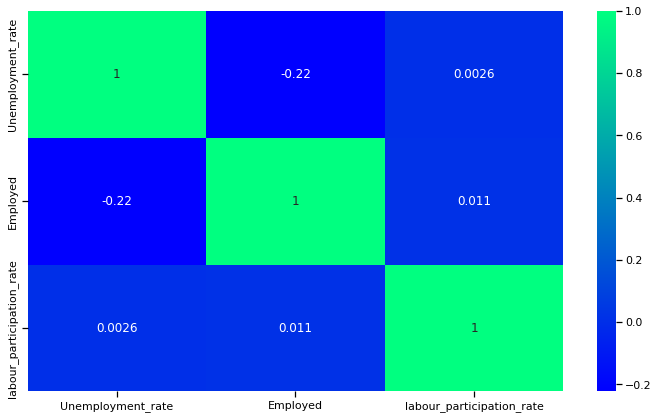

In [24]:
heat_maps = df_dropped[['Unemployment_rate','Employed','labour_participation_rate']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(12,7))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='winter');

Heat map for data of Jan-2020 to Oct-2020

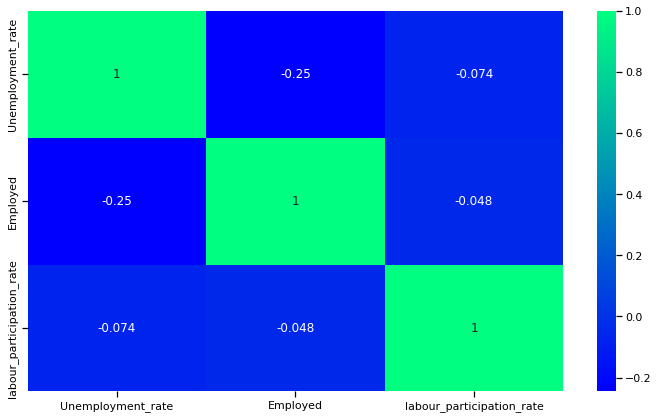

In [25]:
heat_maps = df2[['Unemployment_rate','Employed','labour_participation_rate']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(12,7))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='winter');

Histplot for data of May-2019 to June-2020

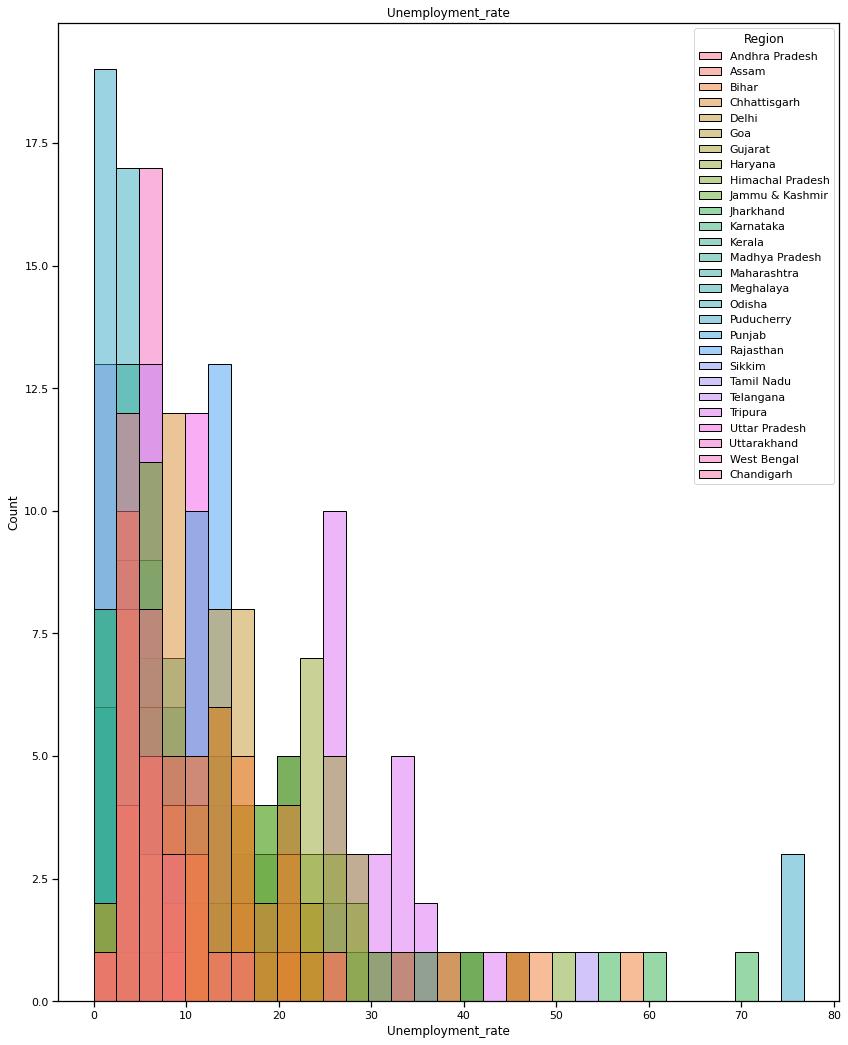

In [26]:
plt.figure(figsize=(14, 18))
plt.title("Unemployment_rate")
sns.histplot(x="Unemployment_rate", hue="Region", data=df_dropped)
plt.show()

Histplot for data of Jan-2020 to Oct-2020

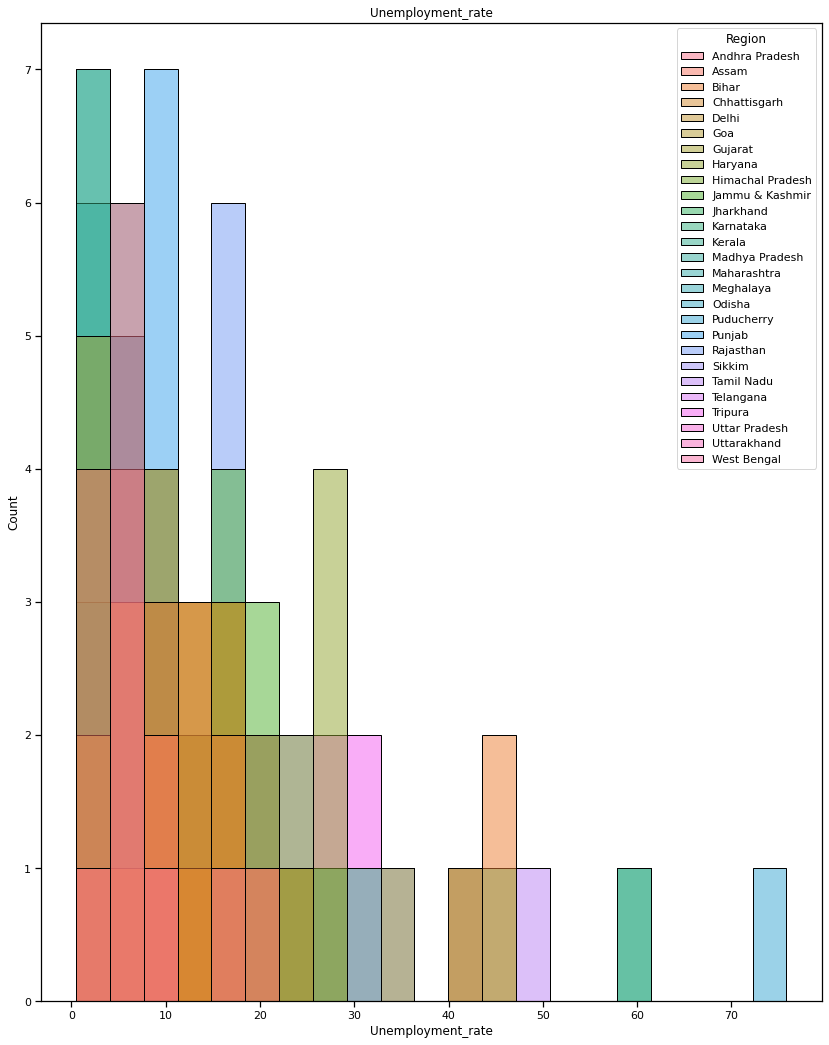

In [27]:
plt.figure(figsize=(14, 18))
plt.title("Unemployment_rate")
sns.histplot(x="Unemployment_rate", hue="Region", data=df2)
plt.show()

Region vise average employoment plot for data of May-2019 to June-2020

In [28]:
region = df_dropped.groupby(["Region"])[['Unemployment_rate', "Employed", "labour_participation_rate"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="Employed", color="Region", title="Average Employed Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Region vise average employoment plot for data of Jan-2020 to Oct-2020

In [29]:
region = df2.groupby(["Region"])[['Unemployment_rate', "Employed", "labour_participation_rate"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="Employed", color="Region", title="Average Employed Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

State and Region vise unemployoment plot for data of May-2019 to June-2020

In [44]:
unemployment = df_dropped[["Region", "area", "Unemployment_rate"]]

fig = px.sunburst(unemployment, path=['area','Region'], values='Unemployment_rate',
                  title= 'Unemployment rate in every State and Region', height=700)
fig.show()

State and Region vise unemployoment plot for data of Jan-2020 to Oct-2020

In [31]:
unemployment = df2[["Region", "area", "Unemployment_rate"]]

fig = px.sunburst(unemployment, path=['area','Region'], values='Unemployment_rate',
                  title= 'Unemployment rate in every State and Region', height=700)
fig.show()